with padding mask
[0.35714285714285715, 0.40674603174603174, 0.4662698412698413, 0.47619047619047616, 0.5238095238095238, 0.5615079365079365, 0.5337301587301587, 0.5555555555555556, 0.5972222222222222, 0.6091269841269841, 0.628968253968254, 0.6130952380952381, 0.626984126984127, 0.6547619047619048, 0.625, 0.6468253968253969, 0.6587301587301587, 0.6785714285714286, 0.6607142857142857, 0.6845238095238095, 0.6646825396825397, 0.6607142857142857, 0.6646825396825397, 0.6607142857142857, 0.6686507936507936]
without padding mask for comparing
[0.3115079365079365, 0.41865079365079366, 0.4781746031746032, 0.5297619047619048, 0.5357142857142857, 0.5317460317460317, 0.5912698412698413, 0.5952380952380952, 0.6071428571428571, 0.6507936507936508, 0.6170634920634921, 0.6170634920634921, 0.6190476190476191, 0.6369047619047619, 0.6488095238095238, 0.6309523809523809, 0.6587301587301587, 0.6646825396825397, 0.6686507936507936, 0.6686507936507936, 0.6587301587301587, 0.6666666666666666, 0.66666666666666

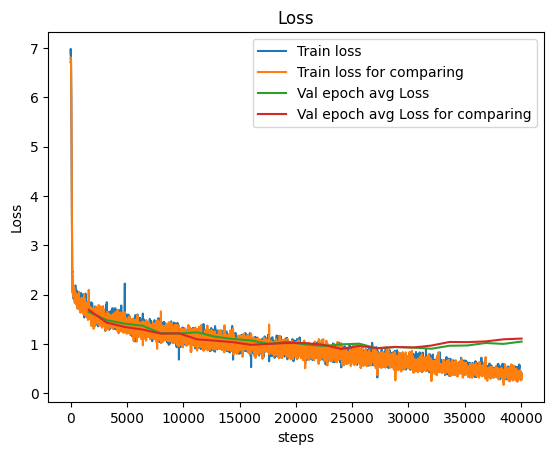

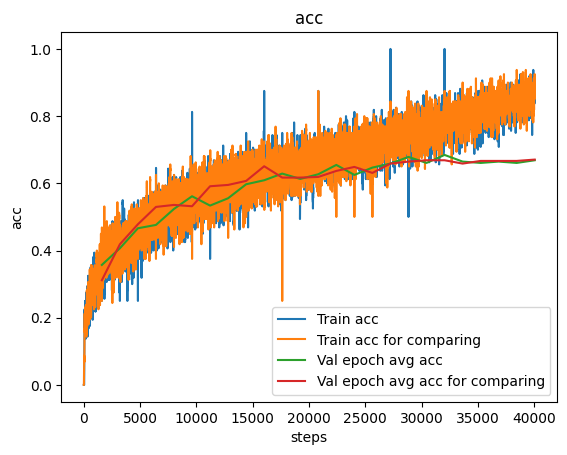

max of val avg acc: 0.6845238095238095
for compare max of val avg_acc: 0.6706349206349206


In [2]:
import matplotlib.pyplot as plt
import numpy as np

num_train = 1602
num_val = 63

f1 = open( './P_M_train.log')
f2 = open( './P_M_val.log')
f3 = open( './P_M_compare_train.log')
f4 = open( './P_M_compare_val.log')

x = []
loss = []
acc = []
x_c = []
loss_c = []
acc_c = []
v_x = []
v_loss = []
v_acc = []
v_x_c = []
v_loss_c = []
v_acc_c = []
v_avg_x = []
v_avg_loss = []
v_avg_acc = []
v_avg_x_c = []
v_avg_loss_c = []
v_avg_acc_c = []
v2_avg_x = []
v2_avg_loss = []
v2_avg_acc = []
v2_avg_x_c = []
v2_avg_loss_c = []
v2_avg_acc_c = []


for line1 in f1:
    line1_split = line1.split(",")
    x.append( float(line1_split[0].split(':')[1] ) )
    loss.append( float(line1_split[1].split(':')[1]) )
    acc.append( float(line1_split[2].split(':')[1]) )

for line1 in f3:
    line1_split = line1.split(",")
    x_c.append( float(line1_split[0].split(':')[1] ) )
    loss_c.append( float(line1_split[1].split(':')[1]) )
    acc_c.append( float(line1_split[2].split(':')[1]) )

for line2 in f2:
    line2_split = line2.split(",")
    v_x.append( float(line2_split[0].split(':')[1] ) / num_val * num_train )
    v_loss.append( float(line2_split[1].split(':')[1]) )
    v_acc.append( float(line2_split[2].split(':')[1] ) )    

for line2 in f4:
    line2_split = line2.split(",")
    v_x_c.append( float(line2_split[0].split(':')[1] ) / num_val * num_train )
    v_loss_c.append( float(line2_split[1].split(':')[1]) )
    v_acc_c.append( float(line2_split[2].split(':')[1] ) )    
    
    
for i in range( 0, len( v_x ), num_val ):
    v2_avg_x.append( (i + num_val ) / num_val * num_train )
    v2_avg_loss.append( np.mean( v_loss[i:i+ num_val]))
    v2_avg_acc.append( np.mean( v_acc[i:i+ num_val]))
    
for i in range( 0, len( v_x_c ), num_val ):
    v2_avg_x_c.append( (i + num_val ) / num_val * num_train )
    v2_avg_loss_c.append( np.mean( v_loss_c[i:i+ num_val]))
    v2_avg_acc_c.append( np.mean( v_acc_c[i:i+ num_val]))
    
    
moving_avg = num_val
i_max = len( v_loss )
for i in range( int( i_max ) ):
    i2 = i / num_val * num_train
    i4 = i + 1 
    if i4 >= i_max:
        break
    v_avg_x.append( i2 )
    if i4 < moving_avg:
        v_avg_loss.append( np.mean( float('nan') ) )
        v_avg_acc.append( np.mean( 0 ) )
    else:
        v_avg_loss.append( np.mean( v_loss[i4 - moving_avg:i4] ) )
        v_avg_acc.append( np.mean( v_acc[i4 - moving_avg:i4] ) )
        
i_max = len( v_loss_c )
for i in range( int( i_max ) ):
    i2 = i / num_val * num_train
    i4 = i + 1 
    if i4 >= i_max:
        break
    v_avg_x_c.append( i2 )
    if i4 < moving_avg:
        v_avg_loss_c.append( np.mean( float('nan') ) )
        v_avg_acc_c.append( np.mean( 0 ) )
    else:
        v_avg_loss_c.append( np.mean( v_loss_c[i4 - moving_avg:i4] ) )
        v_avg_acc_c.append( np.mean( v_acc_c[i4 - moving_avg:i4] ) )

print( "with padding mask")
print( v2_avg_acc )
print( "without padding mask for comparing")
print( v2_avg_acc_c)

plt.plot( x, loss, label="Train loss")
plt.plot( x_c, loss_c, label="Train loss for comparing")
#plt.plot( v_avg_x, v_avg_loss, label="Val moving avg Loss")
plt.plot( v2_avg_x, v2_avg_loss, label="Val epoch avg Loss")
#plt.plot( v_avg_x_c, v_avg_loss_c, label="Val compare moving avg Loss")
plt.plot( v2_avg_x_c, v2_avg_loss_c, label="Val epoch avg Loss for comparing")
plt.title( "Loss")
plt.xlabel( 'steps')
plt.ylabel( 'Loss')
plt.legend()
#plt.ylim( 0, 20 )
#plt.xlim( 116000, 130000 )
plt.show()

plt.plot( x, acc, label = 'Train acc')
plt.plot( x_c, acc_c, label = 'Train acc for comparing')
#plt.plot( v_avg_x, v_avg_acc, label="Val moving avg acc" )
plt.plot( v2_avg_x, v2_avg_acc, label="Val epoch avg acc" )
#plt.plot( v_avg_x_c, v_avg_acc_c, label="Val compare moving avg acc" )
plt.plot( v2_avg_x_c, v2_avg_acc_c, label="Val epoch avg acc for comparing" )
plt.title( "acc")
plt.xlabel( 'steps')
plt.ylabel( 'acc')
plt.legend()
#plt.ylim( 0.3, 1 )
#plt.xlim( 116000, 130000 )
plt.show()

print( "max of val avg acc:", max( v2_avg_acc))
print( "for compare max of val avg_acc:", max( v2_avg_acc_c))